In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [89]:
df = pd.read_csv('./dadosacoes.csv')

In [90]:
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [91]:
dados = pd.read_csv('dadosacoes.csv')

C:\Users\dsadm\AppData\Local\Temp\ipykernel_31080\3497628641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


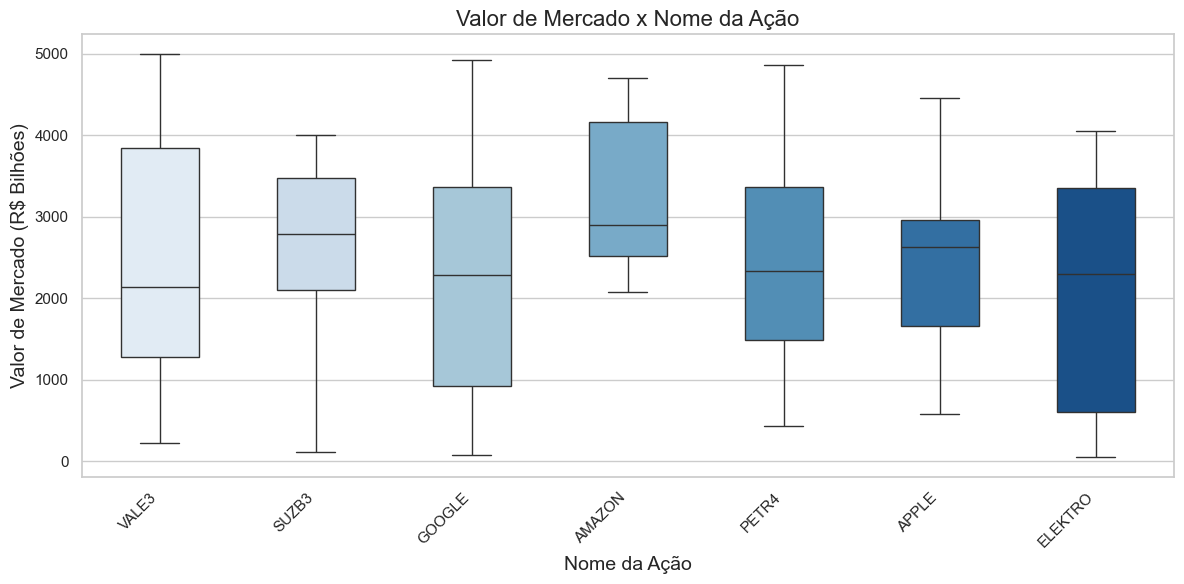

In [92]:
plt.figure(figsize=(12, 6)) 
sns.set(style="whitegrid")  

boxplot = sns.boxplot(
    data=dados, 
    x='nome ação',  
    y='valor de mercado R$ -(Bilhões)', 
    palette="Blues", 
    width=0.5 
)

plt.title('Valor de Mercado x Nome da Ação', fontsize=16)  
plt.xlabel('Nome da Ação', fontsize=14) 
plt.ylabel('Valor de Mercado (R$ Bilhões)', fontsize=14)  
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()  
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [94]:
df.describe

<bound method NDFrame.describe of    nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0      VALE3            194          45                            2134
1      SUZB3             91          71                            3069
2      SUZB3            165          41                            2815
3      SUZB3             56          34                            3613
4     GOOGLE            212           9                            2975
..       ...            ...         ...                             ...
95     SUZB3            208          78                            3035
96     VALE3            253          60                            3263
97    GOOGLE             99          35                             980
98     VALE3             82          43                            1866
99     VALE3            111          19                             230

[100 rows x 4 columns]>

In [95]:
df_dummies = pd.get_dummies(df, columns=None, drop_first=True, dtype=None)

print(df_dummies)

    preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
0             194          45                            2134   
1              91          71                            3069   
2             165          41                            2815   
3              56          34                            3613   
4             212           9                            2975   
..            ...         ...                             ...   
95            208          78                            3035   
96            253          60                            3263   
97             99          35                             980   
98             82          43                            1866   
99            111          19                             230   

    nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  \
0             False              False             False            False   
1             False              False             False         

In [96]:
df = pd.to_numeric(df['nome ação'], errors='coerce')
print(df)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
95   NaN
96   NaN
97   NaN
98   NaN
99   NaN
Name: nome ação, Length: 100, dtype: float64


In [97]:
dados_coluna = np.column_stack(df)

In [98]:
df_cleaned = df_dummies.dropna()
print("Valores ausentes após limpeza:")
print(df_cleaned.isna().sum())

Valores ausentes após limpeza:
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
nome ação_APPLE                   0
nome ação_ELEKTRO                 0
nome ação_GOOGLE                  0
nome ação_PETR4                   0
nome ação_SUZB3                   0
nome ação_VALE3                   0
dtype: int64


In [99]:
if df_cleaned.empty:
    print("O DataFrame está vazio após a remoção dos NaN. Por favor, verifique seus dados.")
else:
    print("Valores ausentes após limpeza:")
    print(df_cleaned.isna().sum())

    print("Dimensões do DataFrame após limpeza:", df_cleaned.shape)

    if df_cleaned.shape[0] < 2 or df_cleaned.shape[1] < 2:
        print("O DataFrame precisa ter pelo menos 2 linhas e 2 colunas para aplicar o KMeans.")
    else:

        kmeans = KMeans(n_clusters=4)


        kmeans.fit(df_cleaned)


        print("Centros dos clusters:")
        print(kmeans.cluster_centers_)


        print("Rótulos dos clusters:")
        print(kmeans.labels_)

Valores ausentes após limpeza:
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
nome ação_APPLE                   0
nome ação_ELEKTRO                 0
nome ação_GOOGLE                  0
nome ação_PETR4                   0
nome ação_SUZB3                   0
nome ação_VALE3                   0
dtype: int64
Dimensões do DataFrame após limpeza: (100, 9)
Centros dos clusters:
[[1.44464286e+02 5.32142857e+01 6.12000000e+02 7.14285714e-02
  2.14285714e-01 3.92857143e-01 1.07142857e-01 7.14285714e-02
  1.42857143e-01]
 [1.50160000e+02 4.88400000e+01 3.75792000e+03 4.00000000e-02
  1.60000000e-01 2.40000000e-01 8.00000000e-02 1.60000000e-01
  2.00000000e-01]
 [1.19564103e+02 5.17692308e+01 2.41610256e+03 2.05128205e-01
  7.69230769e-02 1.79487179e-01 7.69230769e-02 2.05128205e-01
  1.02564103e-01]
 [1.44000000e+02 5.88750000e+01 4.75725000e+03 1.25000000e-01
  0.00000000e+00 1.25000000e-01 2.50000000e-01 0.00000000e+00
  2.50000000e-

Centros dos clusters:
[[1.39115385e+02 4.92307692e+01 4.16784615e+03 7.69230769e-02
  1.15384615e-01 1.92307692e-01 7.69230769e-02 1.53846154e-01
  1.92307692e-01 1.69230769e+00]
 [1.53038462e+02 5.03076923e+01 5.53961538e+02 3.84615385e-02
  2.30769231e-01 3.84615385e-01 1.15384615e-01 7.69230769e-02
  1.53846154e-01 1.00000000e+00]
 [1.53136364e+02 5.45454545e+01 3.02045455e+03 1.81818182e-01
  9.09090909e-02 2.27272727e-01 9.09090909e-02 1.81818182e-01
  9.09090909e-02 1.36363636e-01]
 [1.01884615e+02 5.43461538e+01 2.08280769e+03 1.92307692e-01
  7.69230769e-02 1.92307692e-01 1.15384615e-01 1.53846154e-01
  1.53846154e-01 3.00000000e+00]]
Rótulos dos clusters:
[3 2 2 0 2 1 1 2 3 3 3 1 3 0 0 3 0 3 3 0 2 3 3 1 3 1 3 0 0 3 1 3 3 3 0 0 0
 0 1 2 2 1 0 0 2 2 1 1 3 1 2 2 0 3 2 3 2 1 3 1 0 2 1 2 3 1 0 1 2 0 1 1 0 0
 3 3 1 1 0 0 2 3 1 1 2 1 3 0 0 2 2 1 0 0 0 2 2 1 3 1]
DataFrame com os rótulos dos clusters:
    preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
0             194  

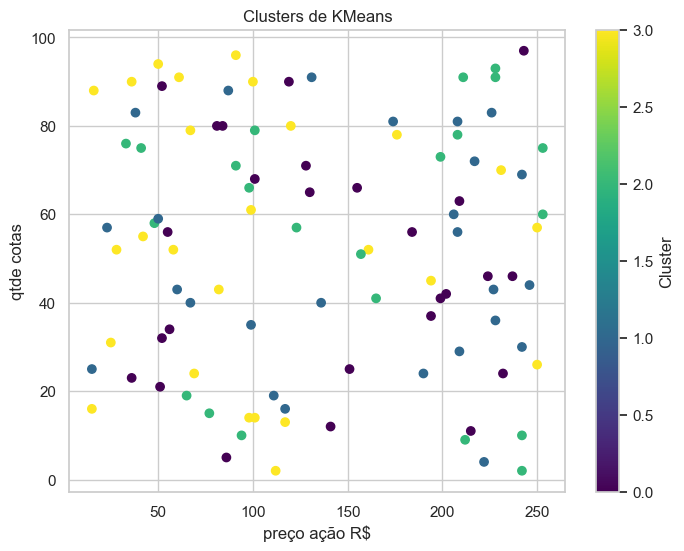

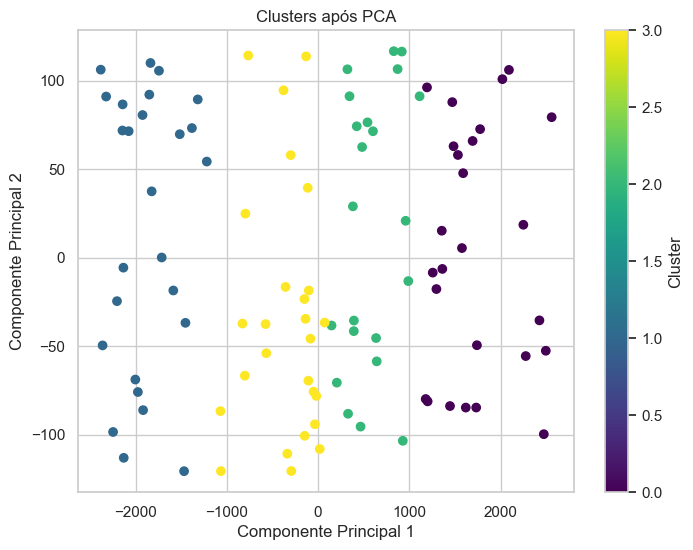

In [101]:
if df_cleaned.shape[1] >= 2:

    kmeans = KMeans(n_clusters=4)
    kmeans.fit(df_cleaned)
    
    print("Centros dos clusters:")
    print(kmeans.cluster_centers_)

    print("Rótulos dos clusters:")
    print(kmeans.labels_)

    df_cleaned['Cluster'] = kmeans.labels_
  
    print("DataFrame com os rótulos dos clusters:")
    print(df_cleaned)

    plt.figure(figsize=(8, 6))
    plt.scatter(df_cleaned.iloc[:, 0], df_cleaned.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.xlabel(df_cleaned.columns[0])
    plt.ylabel(df_cleaned.columns[1])
    plt.title('Clusters de KMeans')
    plt.colorbar(label='Cluster')
    plt.show()

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_cleaned)

    plt.figure(figsize=(8, 6))
    plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Clusters após PCA')
    plt.colorbar(label='Cluster')
    plt.show()